In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [2]:
# 2. Load Dataset
# Dataset has no header; first column is the letter (target)
column_names = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar',
                'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br',
                'x-ege', 'xegvy', 'y-ege', 'yegvx']

df = pd.read_csv(r"C:\Users\LENOVO\Downloads\DL_LAB_EXAM\DL_LAB_EXAM\Datasets\UCI_letter_recognition\letter-recognition.data", header=None, names=column_names)
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (20000, 17)


,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
# 3. Preprocessing
# Encode letter labels (A-Z) to integers (0-25)
label_encoder = LabelEncoder()
df['letter'] = label_encoder.fit_transform(df['letter'])

X = df.drop('letter', axis=1).values
y = df['letter'].values

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [5]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# 4. Build the DNN Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(26, activation='softmax')  # 26 output classes
])

In [7]:
# 5. Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# 6. Train the Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
200/200 [==============================] - 2s 5ms/step - loss: 2.4832 - accuracy: 0.2719 - val_loss: 1.3562 - val_accuracy: 0.6206
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 1.4285 - accuracy: 0.5495 - val_loss: 0.9782 - val_accuracy: 0.7122
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 1.1766 - accuracy: 0.6273 - val_loss: 0.8378 - val_accuracy: 0.7575
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 1.0457 - accuracy: 0.6687 - val_loss: 0.7471 - val_accuracy: 0.7906
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.9710 - accuracy: 0.6930 - val_loss: 0.6970 - val_accuracy: 0.8037
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.9163 - accuracy: 0.7071 - val_loss: 0.6425 - val_accuracy: 0.8203
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.8665 - accuracy: 0.7247 - val_loss: 0.6094 - val_accuracy: 0.8288
Epoch 

In [9]:
# 7. Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


Test Accuracy: 84.70%


In [10]:
# 8. Predictions and Evaluation
y_pred = np.argmax(model.predict(X_test), axis=1)

125/125 [==============================] - 0s 2ms/step


In [11]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
              precision    recall  f1-score   support

           A       0.97      0.91      0.94       158
           B       0.71      0.92      0.80       153
           C       0.95      0.85      0.90       147
           D       0.78      0.85      0.82       161
           E       0.83      0.90      0.87       154
           F       0.89      0.80      0.84       155
           G       0.73      0.79      0.76       155
           H       0.91      0.59      0.71       147
           I       0.89      0.79      0.84       151
           J       0.94      0.85      0.89       149
           K       0.79      0.86      0.83       148
           L       0.91      0.86      0.88       152
           M       0.92      0.94      0.93       158
           N       0.93      0.86      0.89       157
           O       0.82      0.84      0.83       150
           P       0.90      0.88      0.89       161
           Q       0.79      0.95      0.86       157
   

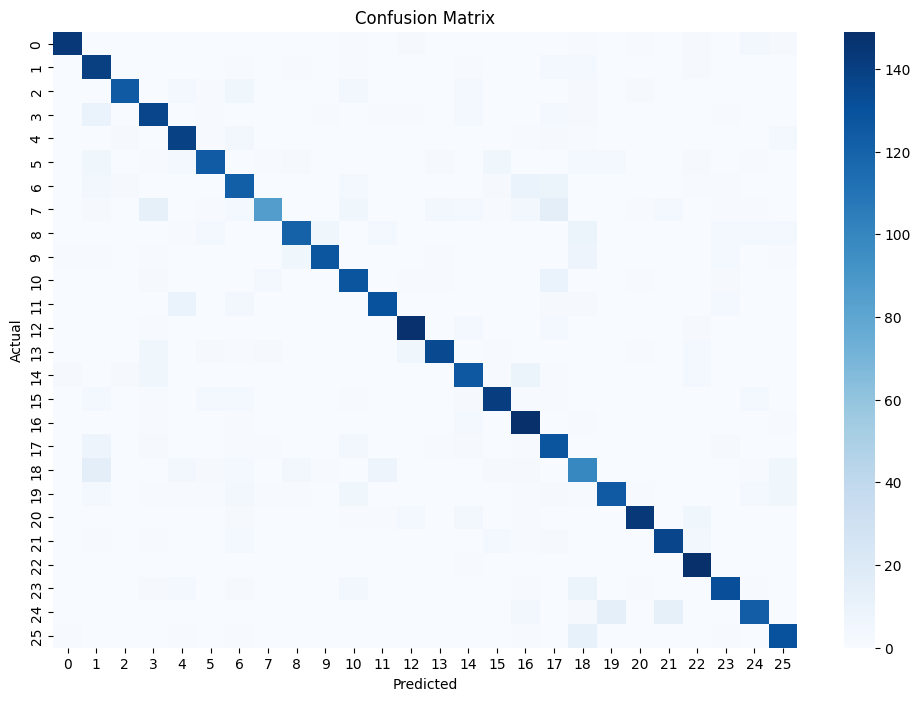

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

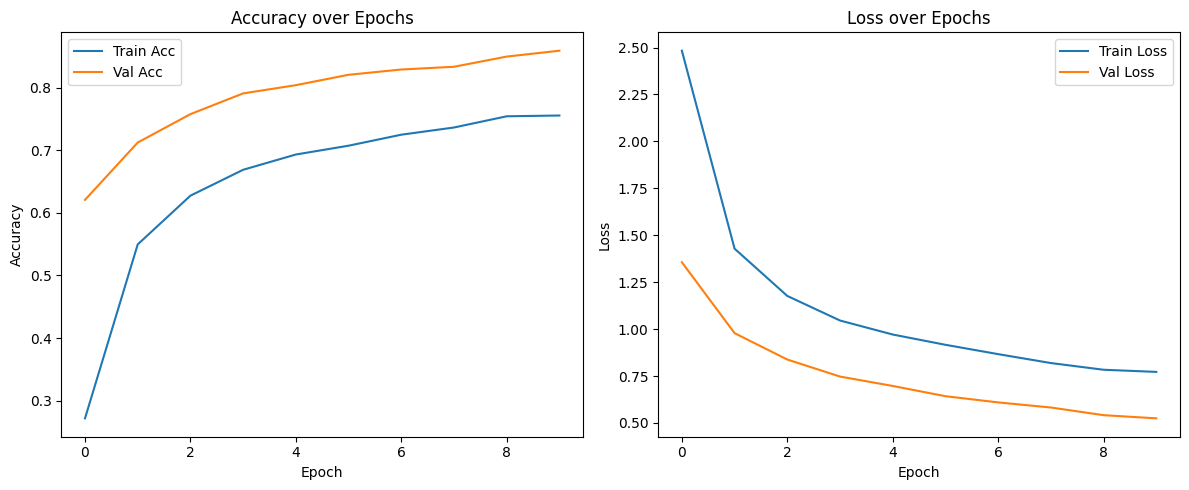

In [13]:
# 9. Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

125/125 [==============================] - 0s 2ms/step


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17668\349725520.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', n_classes)


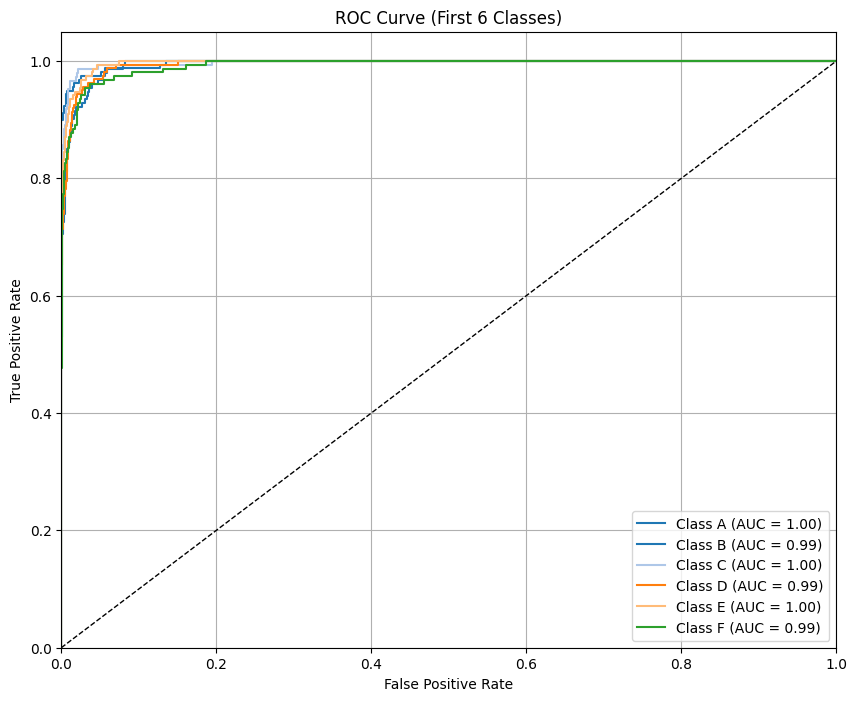

In [14]:
# ROC Curve for Multiclass
n_classes = 26
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_score = model.predict(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for first 6 classes (just for clarity; can do all if desired)
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab20', n_classes)

for i in range(6):  # Change to range(n_classes) to plot all 26
    plt.plot(fpr[i], tpr[i],
             label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})',
             color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (First 6 Classes)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()